# Defining and Training HistGradientBoostingRegressor Model for set-1 features

In [1]:
#import libraries
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import warnings

# ignore all warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [2]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.head()

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [3]:
df = pd.DataFrame(df)
df

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25
2022-12-29 09:15:00+05:30,NSEI,uf-n-1647516806122,18059.80,18229.70,17992.80,18207.10


In [4]:
#feature extraction
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_year'] = df.index.dayofyear

In [5]:
#store features
features=['month', 'year', 'day_of_year']
target='close'

In [6]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

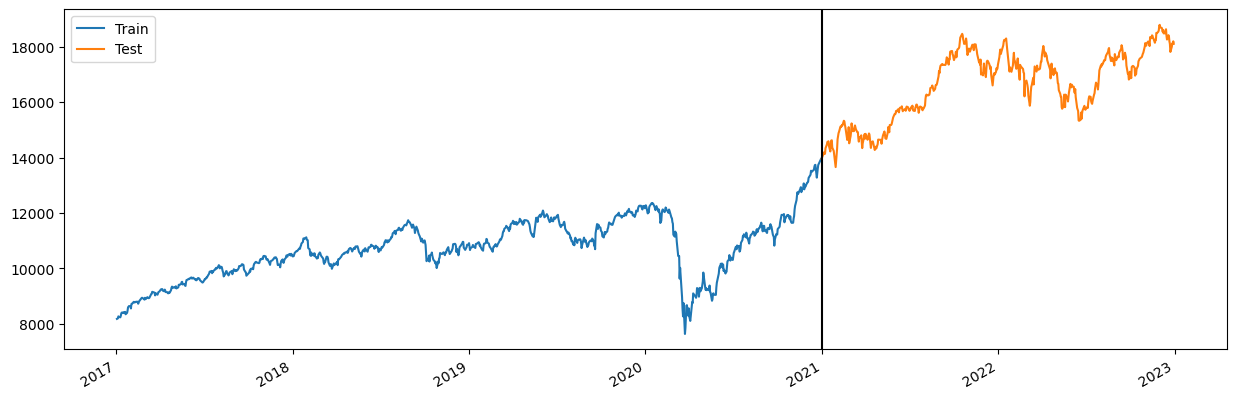

In [7]:
#train/test data plotting
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='31-12-2020']

fig,ax=plt.subplots(figsize=(15,5))
train['close'].plot(ax=ax,label='Training Set')
test['close'].plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [8]:
#define model
hgbr = HistGradientBoostingRegressor()
print(hgbr)

HistGradientBoostingRegressor()


In [9]:
#fit the model
hgbr.fit(xtrain, ytrain)

HistGradientBoostingRegressor()

In [10]:
#get score
score = hgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9985414880491144


In [11]:
#apply cross validation
scores = cross_val_score(hgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [12]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(hgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [13]:
#evaluate model's performance on train data
predict = hgbr.predict(xtrain)
r2 = r2_score(ytrain, predict)
mse = mean_squared_error(ytrain, predict)
rmse = mean_squared_error(ytrain, predict, squared=False)
mae = mean_absolute_error(ytrain, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9985414880491144
Mean Squared Error: 13145.440633745491
Root Mean Squared Error: 114.65356790674022
Mean Absolute Error: 82.62260384509698


In [14]:
#evaluate model's performance on test data
ypred = hgbr.predict(xtest)
r2 = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = mean_squared_error(ytest, ypred, squared=False)
mae = mean_absolute_error(ytest, ypred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9967238240494589
Mean Squared Error: 30099.11456646345
Root Mean Squared Error: 173.4909639331785
Mean Absolute Error: 124.1082269260644


# Predict close price on test DMY(day, month, year)

In [15]:
#predict value against test
y_pred=hgbr.predict(test[features])

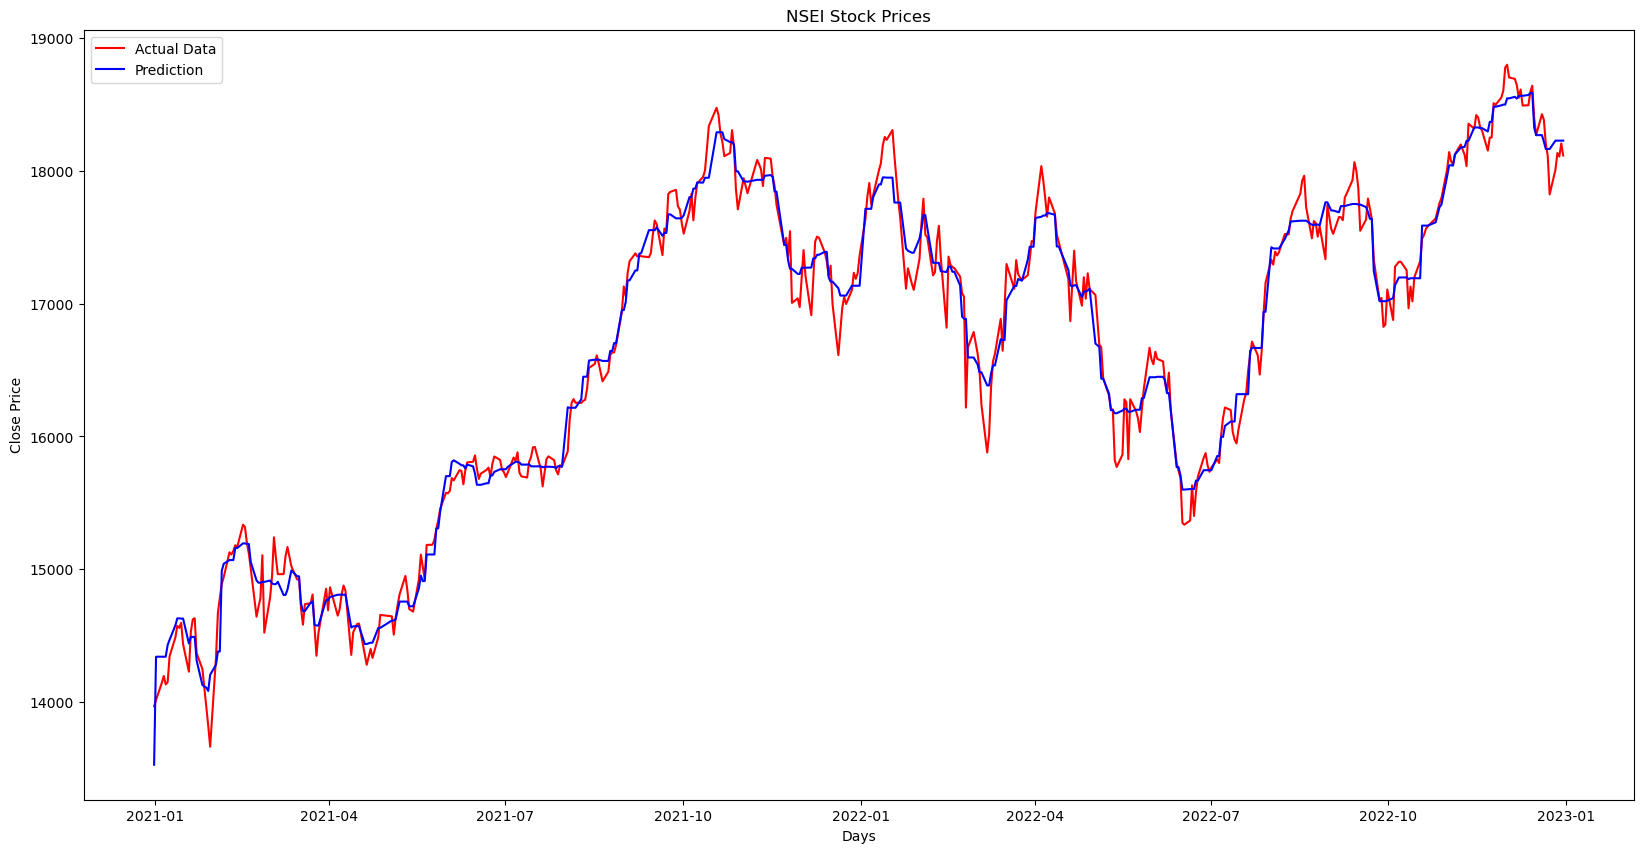

In [16]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [17]:
#getting dataframe
import pytz
data_=[]
index_ = test.index.tolist()

try:
    for i in range(1,len(index_)):          
        if y_pred[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

In [18]:
#storing in csv file
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/nsei_stock01.csv'):
    with open('nsei_stock01.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock01.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

# Get Next Day Price

In [19]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance
import yfinance as yf
from time import time
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.3 MB/s eta 0:00:00


In [20]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)

In [21]:
#retrieve data from this day one year before to today
end_date = datetime.date.today() - datetime.timedelta(days=1)
start_date = end_date - datetime.timedelta(days=365)
day = datetime.date.today()
stock = data.history(start=start_date, end=end_date)

In [22]:
#feature extraction
stock['month'] = stock.index.month
stock['year'] = stock.index.year
stock['day_of_year'] = stock.index.dayofyear

In [23]:
#last day month, year and day of year
stock.iloc[-1][features]

month             3.0
year           2023.0
day_of_year      87.0
Name: 2023-03-28 00:00:00+05:30, dtype: float64

In [24]:
def next_day_price(stock, day):
    x=stock[features]
    y=stock['Close']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model = HistGradientBoostingRegressor()
    model.fit(x_train, y_train)
    predicted_price=model.predict([stock.iloc[-1][features]])
    print(f"Predicted price for the {day}:", predicted_price)

In [25]:
#predict price
next_day_price(stock,day)

Predicted price for the 2023-03-30: [17187.04612341]


# Defining and Training GradientBoostingRegressor Model for set-2 features

In [26]:
#retrieve data
df=pd.read_csv("/kaggle/input/nsei-prev-data/in_nsei_daily.csv",index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.head()

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85


In [27]:
#store features
features=['open', 'high', 'low']
target='close'

In [28]:
#train and test splits
xtrain, xtest, ytrain, ytest=train_test_split(df[features], df[target], test_size=0.15)

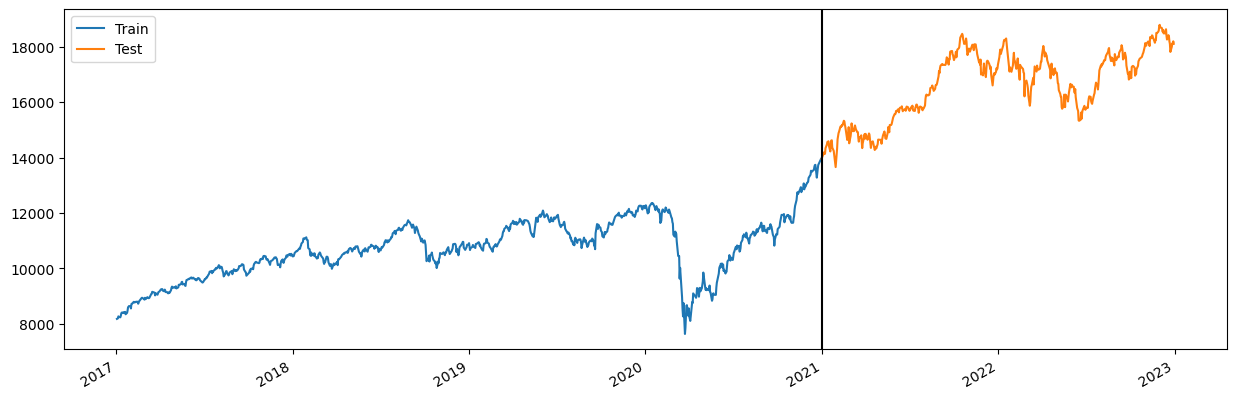

In [29]:
#train/test data plotting
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='31-12-2020']

fig,ax=plt.subplots(figsize=(15,5))
train['close'].plot(ax=ax,label='Training Set')
test['close'].plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [30]:
#define model
hgbr = HistGradientBoostingRegressor()
print(hgbr)

HistGradientBoostingRegressor()


In [31]:
#fit the model
hgbr.fit(xtrain, ytrain)

HistGradientBoostingRegressor()

In [32]:
#get score
score = hgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9997348316102723


In [33]:
#apply cross validation
scores = cross_val_score(hgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [34]:
#apply k-folds
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(hgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 1.00


In [35]:
#evaluate model's performance on train data
predict = hgbr.predict(xtrain)
r2 = r2_score(ytrain, predict)
mse = mean_squared_error(ytrain, predict)
rmse = mean_squared_error(ytrain, predict, squared=False)
mae = mean_absolute_error(ytrain, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9997348316102723
Mean Squared Error: 2406.3108227537755
Root Mean Squared Error: 49.05416213486655
Mean Absolute Error: 33.328359836712714


In [36]:
#evaluate model's performance on test data
ypred = hgbr.predict(xtest)
r2 = r2_score(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = mean_squared_error(ytest, ypred, squared=False)
mae = mean_absolute_error(ytest, ypred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9995294171251742
Mean Squared Error: 4126.985170810591
Root Mean Squared Error: 64.24161556818595
Mean Absolute Error: 46.45142823257154


# Predict close price on test OHL(open, high, low)

In [37]:
#predict value against test
y_pred=hgbr.predict(test[features])

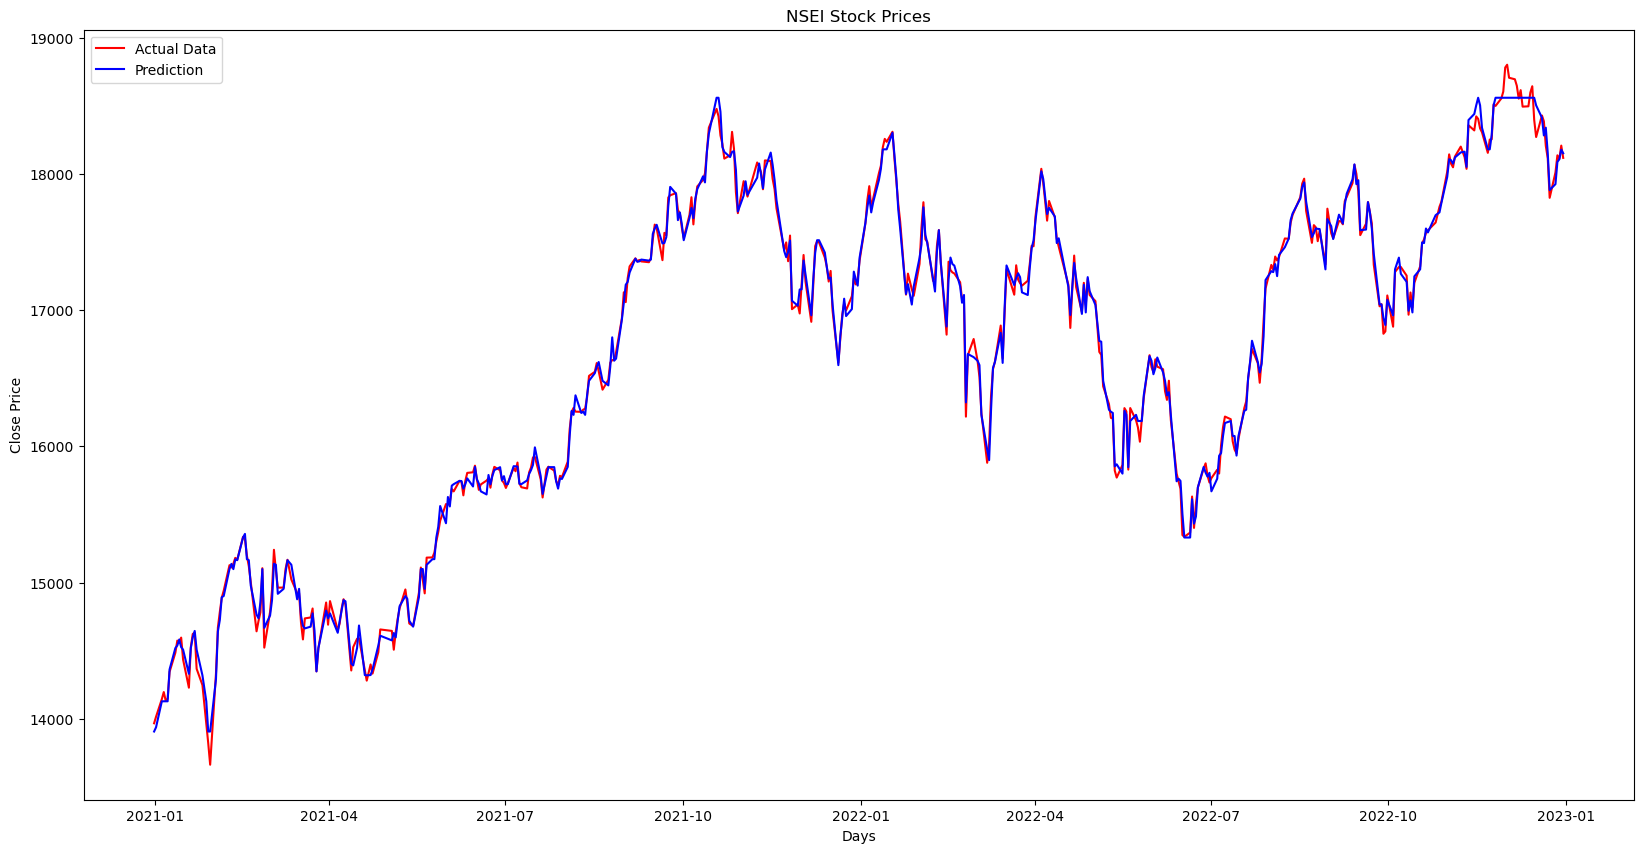

In [38]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred, color='blue', label="Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [39]:
#getting dataframe
import pytz
data_=[]
index_ = test.index.tolist()

try:
    for i in range(1,len(index_)):          
        if y_pred[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

In [40]:
#storing in csv file
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/nsei_stock02.csv'):
    with open('nsei_stock02.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in data_:
            writer.writerow(row)
else:
    with open('nsei_stock02.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in data_:
            writer.writerow(row)

# Get Next Day Price

In [41]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance
import yfinance as yf
from time import time
import datetime

In [42]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)

In [43]:
#retrieve data from this day one year before to today
end_date = datetime.date.today() - datetime.timedelta(days=1)
start_date = end_date - datetime.timedelta(days=365)
day = datetime.date.today()
stock = data.history(start=start_date, end=end_date)

In [44]:
#last day month, year and day of year
stock.iloc[-1][['Open','High','Low']]

Open    17031.75
High    17061.75
Low     16913.75
Name: 2023-03-28 00:00:00+05:30, dtype: float64

In [45]:
def next_day_price(stock, day):
    x=stock[['Open','High','Low']]
    y=stock['Close']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    model = HistGradientBoostingRegressor()
    model.fit(x_train, y_train)
    predicted_price=model.predict([stock.iloc[-1][['Open','High','Low']]])
    print(f"Predicted price for the {day}:", predicted_price)

In [46]:
#predict price
next_day_price(stock,day)

Predicted price for the 2023-03-30: [16955.71474399]
